In [98]:
class ParticleColoring:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = len(graph)
        self.colors = {node: None for node in graph}  # Početno, nijedan čvor nije obojen
        self.personal_best_colors = None
        self.personal_best_fitness = float('inf')  # Početna vrednost za najbolju ocenu
        
    def calculate_fitness(self):
        unique_colors = len(set(self.colors.values()))
        return unique_colors

    def update_position(self):
        for node in self.graph:
            neighbor_colors = set(self.colors[neighbor] for neighbor in self.graph[node] if self.colors[neighbor] is not None)
            new_color = 0
            while new_color in neighbor_colors:
                new_color += 1
            self.colors[node] = new_color

    @classmethod
    def update_global_best(cls, personal_best_fitness, personal_best_colors):
        if personal_best_fitness < cls.swarm_best_fitness:
            cls.swarm_best_fitness = personal_best_fitness
            cls.swarm_best_colors = personal_best_colors.copy()

def pso_coloring(graph, swarm_size, num_iters):
    ParticleColoring.swarm_best_colors = None
    ParticleColoring.swarm_best_fitness = float('inf')
    
    swarm = [ParticleColoring(graph) for _ in range(swarm_size)]
    
    for i in range(num_iters):
        for particle in swarm:
            particle.update_position()
            fitness = particle.calculate_fitness()
            if fitness < particle.personal_best_fitness:
                particle.personal_best_fitness = fitness
                particle.personal_best_colors = particle.colors.copy()
                ParticleColoring.update_global_best(fitness, particle.personal_best_colors)
    
    print("Best colors:", ParticleColoring.swarm_best_colors)
    print("Best fitness:", ParticleColoring.swarm_best_fitness)
    return ParticleColoring.swarm_best_colors, ParticleColoring.swarm_best_fitness


Best colors: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '100':

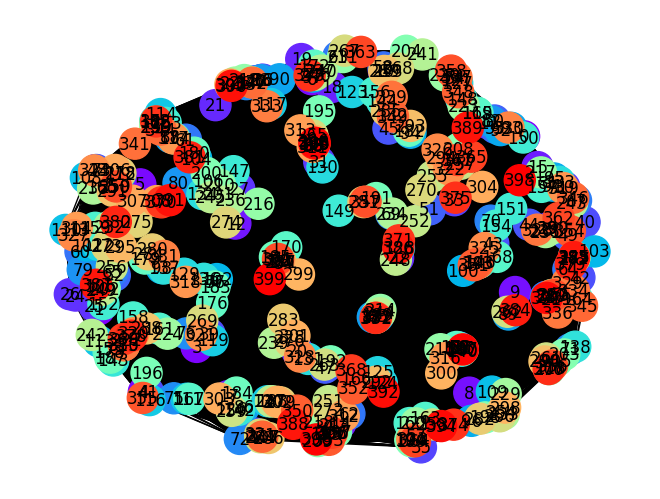

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Definicija funkcije za iscrtavanje grafa sa bojama čvorova
def plot_graph(graph, colors):
    G = nx.Graph(graph)
    node_colors = [colors[node] for node in G.nodes]
    nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

# Generisanje kompletnog grafa
graph = nx.complete_graph(400)

# Konverzija grafa u reprezentaciju koju očekuje algoritam bojenja
graph = {str(node): [str(neighbor) for neighbor in neighbors] for node, neighbors in graph.adjacency()}

# Pokretanje algoritma bojenja
best_colors, best_fitness = pso_coloring(graph, swarm_size=10, num_iters=100)

# Iscrtavanje grafa sa najboljim bojenjem
plot_graph(graph, best_colors)
